# **Prueba técnica Cielum | Analytics leader**

## Cesar Ramirez Gomez
### Ingeniero electronico
### Estudiante maestria en inteligencia artificial

---
###Modelos de inteligencia artificial 


In [ ]:
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd

In [ ]:
#Leyendo el archivo con los datos y conversion a DataFrame, se define como indice el id del paciente
datos = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/prueba/fracaso_virologico.xlsx")
df = pd.DataFrame(datos)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5406 entries, 0 to 5405
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   id                                     5406 non-null   int64         
 1   estado_final                           5406 non-null   object        
 2   ocupacion                              5406 non-null   object        
 3   regimen                                5406 non-null   object        
 4   acompanante                            5406 non-null   object        
 5   zona_cox                               5406 non-null   object        
 6   estrato_social                         5390 non-null   float64       
 7   preferencia                            4212 non-null   object        
 8   estado_civil                           5388 non-null   float64       
 9   escolaridad                            5390 non-null   float64 

# Exploracion inicial de los datos

Se emplea la librería Pandas con la herramienta Profiling que permite una exploración inicial de los datos tomando en cuenta datos estadísticos.

In [ ]:
#Instalacion de la libreria Pandas Profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.0 MB 152 kB/s
     |████████████████████████████████| 102 kB 16.3 MB/s 
     |████████████████████████████████| 679 kB 66.2 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 9.9 MB 58.8 MB/s 
     |████████████████████████████████| 4.7 MB 36.5 MB/s 
     |████████████████████████████████| 296 kB 63.6 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=708a86718a5a9f62ccd054901e1ec6ce0e6f543418cb040b5eac1846021b1967
  Stored in directory: /tmp/pip-ephem-wheel-cache-b5_oxc5v/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=06df9960cc1c2385f55f589eb73d18f2ff47abdcebc890df6d92db136c3768a9
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764

In [ ]:
#Se carga el Dataframe al que se realizara la exploracion de los datos

from pandas_profiling import ProfileReport
title_name = 'Deteccion fracaso virologico VIH'
date_file_name = "ProfileReport_{}_{}.html".format(datetime.now().strftime('%Y-%m-%d'), title_name)
profile = ProfileReport(df, title='Profiling Report: ' + title_name, html={'style':{'full_width':True}})
profile.to_file(output_file=date_file_name)
profile 

#Matriz de correlacion

In [ ]:
!pip install matplotlib>=3.4.3
!pip install dython


from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['estado_final',
 'ocupacion',
 'regimen',
 'acompanante',
 'zona_cox',
 'preferencia',
 'genero',
 'esquema_arv',
 'grupos_farmacologicos',
 'antecedentes_retrazo_autorizacion_cox',
 'antecedentes_ram',
 'antecedentes_omision',
 'antecedentes_suspension',
 'antecedentes_desafiliacion',
 'antecedentes_no_adherencia',
 'grado_maximo_de_no_adherencia',
 'CT_categorico',
 'Rango_CT',
 'TG_categorico',
 'Rango_TG',
 'HDL_categorico',
 'LDL_categorico',
 'Rango_Riesgo_cardivascular',
 'antecedente_fracaso',
 'Aspergilosis',
 'Micosis',
 'Candidiasis',
 'CMV',
 'Enteritis',
 'Herpes',
 'Histoplasmosis',
 'Sarcoma_Kaposi',
 'Linfoma_carcinoma',
 'Nocardiosis',
 'Encefalitis',
 'Neumonia',
 'Toxoplasmosis',
 'Tuberculosis',
 'Hepatitis_viral',
 'varicela']

In [ ]:
from dython.nominal import associations

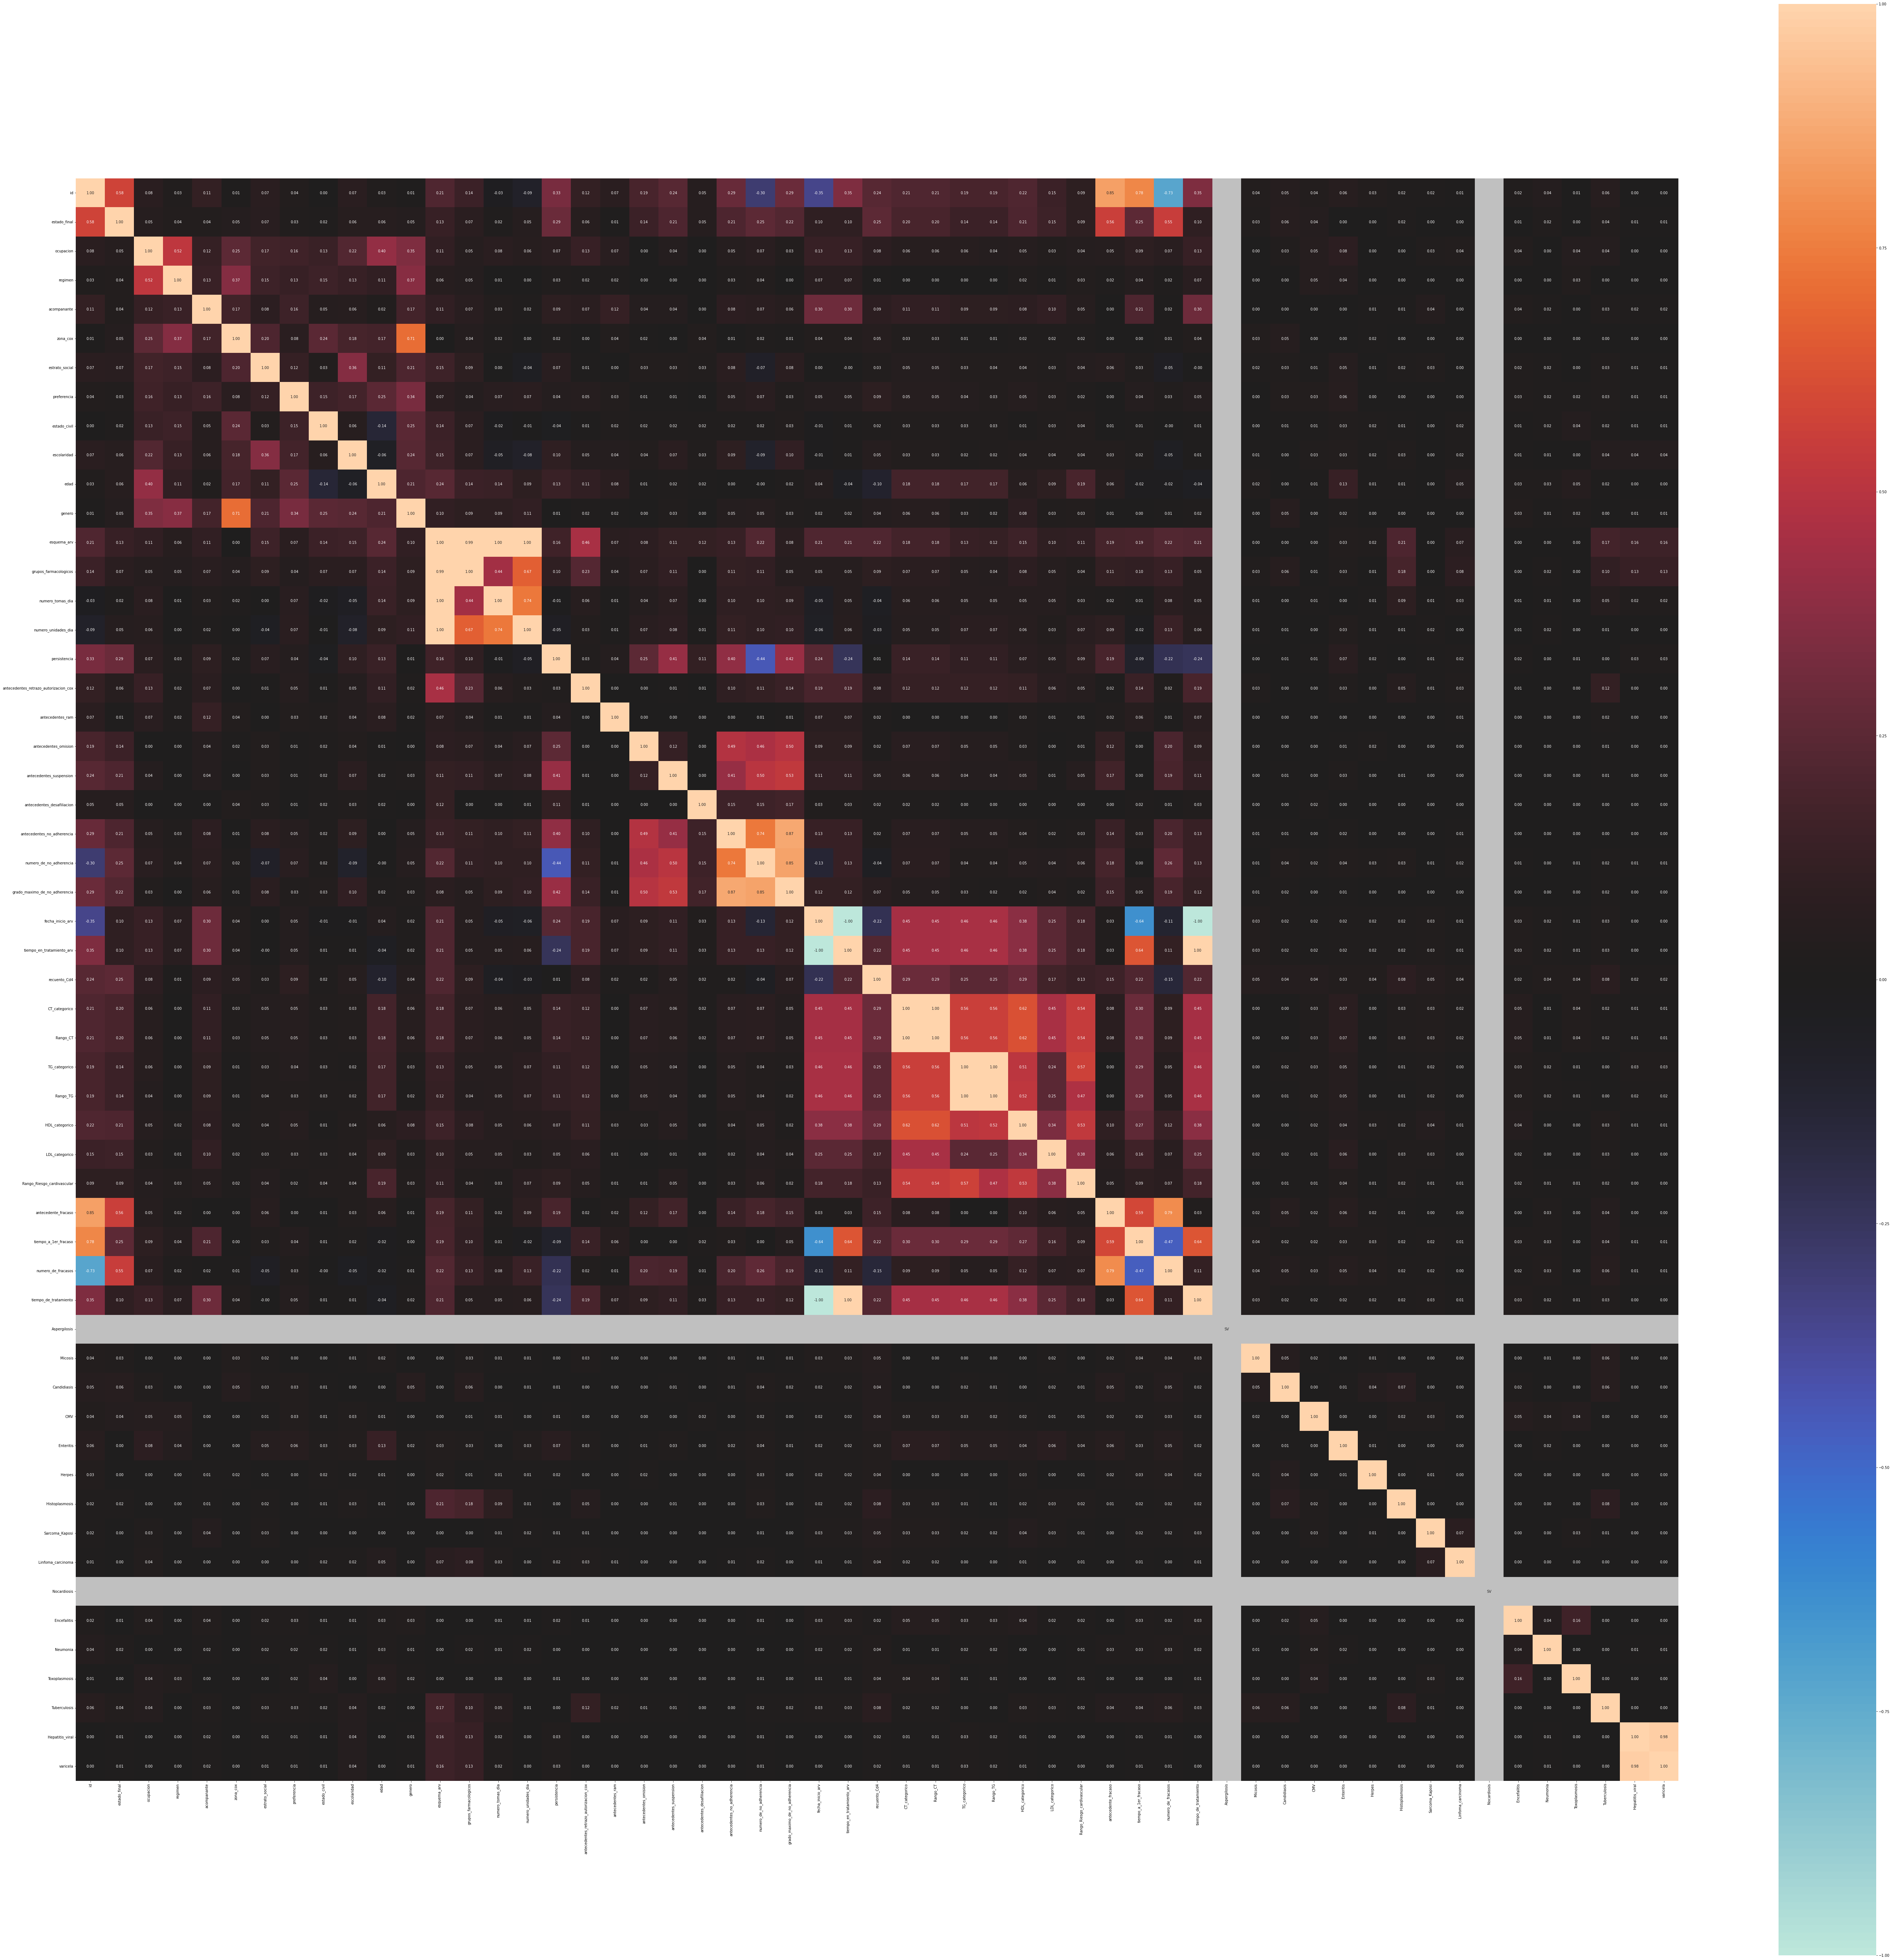

In [ ]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(100,100))

#ELIMINACION DE VARIABLES

In [ ]:
#Se eliminan la variable "tiempo_de_tratamiento" la cual presenta los mismos datos que la variable "tiempo_en_tratamiento_arv"
#Se elimina la variable "Fecha de inicio arv" no representa un valor alto en correlacion y no presenta una ventana de tiempo variable
df.drop(columns=['tiempo_de_tratamiento', 'fecha_inicio_arv', 'ocupacion', 'regimen', 'acompanante', 'zona_cox', 'estrato_social', 'preferencia', 'estado_civil', 'escolaridad', 'edad', 'genero', 'grupos_farmacologicos', 'numero_tomas_dia', 'numero_unidades_dia', 'antecedentes_retrazo_autorizacion_cox', 'antecedentes_ram', 'antecedentes_desafiliacion', 'Rango_Riesgo_cardivascular', 'Aspergilosis', 'Micosis', 'Candidiasis', 'CMV', 'Enteritis', 'Herpes', 'Histoplasmosis', 'Sarcoma_Kaposi', 'Linfoma_carcinoma', 'Nocardiosis', 'Encefalitis', 'Neumonia', 'Toxoplasmosis', 'Tuberculosis', 'Hepatitis_viral', 'varicela'], inplace = True)

Se evidencia que las variables CT_categorico y Rango_CT presentan los mismos valores únicamente cambiando su estructura lingüística además de obtener el mismo porcentaje de perdida de datos 14.2% por lo que se elimina la variable Rango_CT al presentar un menor valor en la matriz de correlación.

In [ ]:
df.drop(columns=['Rango_CT'], inplace = True)

Se evidencia que las variables TG_categorico y Rango_TG presentan los mismos valores únicamente cambiando su estructura lingüística además de obtener el mismo porcentaje de perdida de datos 20.9% por lo que se elimina la variable Rango_TG al presentar un menor valor en la matriz de correlación.

In [ ]:
df.drop(columns=['Rango_TG'], inplace = True)

## **Generacion variable objetivo**

La IPS requiere predecir con 6 meses de anticipación el desenlace "fracaso virológico" por lo cual se realiza un filtro a los datos permitiendo definir la variable objetivo como:

Variable objetivo = 1
*   Pacientes menor o igual a seis meses en tratamiento
*   Paciente con estado final Fracaso

Variable no objetivo = 0
*   Pacientes con mayor o igual a seis meses en tratamiento
*   Pacientes con estado final Exitoso



In [ ]:
#Variable objetivo
df_objetivo = df.query("tiempo_en_tratamiento_arv <= 180 and estado_final=='Fracaso'")
df_objetivo = df_objetivo.assign(Variable_objetivo = 1) #22
#Variable no objetivo
df_no_objetivo = df.query("tiempo_en_tratamiento_arv >= 180 and estado_final== 'Éxito' ")
df_no_objetivo = df_no_objetivo.assign(Variable_objetivo = 0) #4484


In [ ]:
#Generacion nuevo DataFrame con variable objetivo
df_final = df_objetivo
df_final = pd.concat([df_final, df_no_objetivo])
#Se elimina la variable "estado_final" 
df_final.drop(columns=['estado_final'], inplace = True)

# **Imputacion de datos**


Se evidencia una perdida de datos de forma aleatoria

Al encontrarse datos faltantes en las siguientes variables se rellenan con el promedio de los datos

La media suele ser la medida de tendencia central más usada por su alto grado de utilidad para múltiples contextos.

Sin embargo, cuando en una población se presentan casos que cuentan con datos muy por arriba o por debajo de los que presenta el resto del grupo, se recomienda usar la mediana o la moda, pues la media es más afectada por los valores extremos.



In [ ]:
df_procesamiento = df_final

In [ ]:
df_procesamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4506 entries, 255 to 5405
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             4506 non-null   int64  
 1   esquema_arv                    4497 non-null   object 
 2   persistencia                   4506 non-null   float64
 3   antecedentes_omision           4506 non-null   object 
 4   antecedentes_suspension        4506 non-null   object 
 5   antecedentes_no_adherencia     4506 non-null   object 
 6   numero_de_no_adherencia        4506 non-null   int64  
 7   grado_maximo_de_no_adherencia  4506 non-null   object 
 8   tiempo_en_tratamiento_arv      4506 non-null   int64  
 9   recuento_Cd4                   4297 non-null   float64
 10  CT_categorico                  3986 non-null   object 
 11  TG_categorico                  3683 non-null   object 
 12  HDL_categorico                 3897 non-null  

**Esquema ARV** 

La variable tiene una perdida 0.2% de los datos, se calcula la moda contando los elementos en cada clase. La mayor clase es de "Abacavir/Lamivudina+Efavirenz" con 12988 filas. Se reemplaza los valores NaN con la clase de mayor frecuencia.




In [ ]:
df_procesamiento['esquema_arv'].value_counts()

Abacavir/Lamivudina+Efavirenz                      1288
Emtricitabina/Tenofovir+Efavirenz                  1223
Emtricitabina/Tenofovir+Atazanavir+Ritonavir        307
Efavirenz/Emtricitabina/Tenofovir                   240
Abacavir/Lamivudina+Atazanavir+Ritonavir            217
Emtricitabina/Tenofovir+Raltegravir                 178
Abacavir/Lamivudina+Nevirapina                      155
Emtricitabina/Tenofovir+Lopinavir/Ritonavir         121
Abacavir/Lamivudina+Lopinavir/Ritonavir             102
Dolutegravir/Abacavir/Lamivudina                     94
Emtricitabina/Tenofovir+Nevirapina                   75
Abacavir/Lamivudina+Raltegravir                      66
Emtricitabina/Tenofovir+Dolutegravir                 65
Abacavir/Lamivudina+Atazanavir/Ritonavir             47
Emtricitabina/Tenofovir+Darunavir+Ritonavir          38
Lamivudina/Zidovudina+Efavirenz                      33
Emtricitabina/Tenofovir+Atazanavir/Ritonavir         32
Emtricitabina/Tenofovir/Rilpivirina             

In [ ]:
df_procesamiento['esquema_arv'] = df['esquema_arv'].replace(np.nan, "Abacavir/Lamivudina+Efavirenz")

**Recuento_Cd4**

La variable tiene una perdida 6.8% de los datos, se calcula la media para reemplazar los valores vacios.

In [ ]:
df_procesamiento['recuento_Cd4'] = df['recuento_Cd4'].replace(np.nan, round(df_procesamiento['recuento_Cd4'].mean()))

**CT_categorico** 

La variable tiene una perdida 14.2% de los datos, se calcula la moda contando los elementos en cada clase. Se reemplaza los valores NaN con la clase de mayor frecuencia.

In [ ]:
df_procesamiento['CT_categorico'].value_counts()

a. 200 mg/dL o menos    2853
b. 201 mg/dL o más      1133
Name: CT_categorico, dtype: int64

In [ ]:
df_procesamiento['CT_categorico'] = df['CT_categorico'].replace(np.nan, "a. 200 mg/dL o menos")

**TG_categorico**

La variable tiene una perdida 20.9% de los datos, se calcula la moda contando los elementos en cada clase. Se reemplaza los valores NaN con la clase de mayor frecuencia.

In [ ]:
df_procesamiento['TG_categorico'].value_counts()

a. 200 mg/dL o menos    2667
b. 201 mg/dL o más      1016
Name: TG_categorico, dtype: int64

In [ ]:
df_procesamiento['TG_categorico'] = df['TG_categorico'].replace(np.nan, "a. 200 mg/dL o menos")

**HDL_categorico**

La variable tiene una perdida 16.6% de los datos, se calcula la moda contando los elementos en cada clase. Se reemplaza los valores NaN con la clase de mayor frecuencia.

In [ ]:
df_procesamiento['HDL_categorico'].value_counts()

a. 40 mg/dL o más      2080
b. 39 mg/dL o menos    1817
Name: HDL_categorico, dtype: int64

In [ ]:
df_procesamiento['HDL_categorico'] = df['HDL_categorico'].replace(np.nan, "a. 40 mg/dL o más")

**LDL categorico**

La variable tiene una perdida 43.3% de los datos lo cual es un porcentaje alto, su valor en la matriz de correlacion es de 0.15. Se elimina la variable por su alto valor en perdida de datos y poca relevancia en comparacion. 

Hipotesis: la perdida al estar cerca del 50% y realizar imputacion de datos presentaria sesgo y varianza al modelo. 

In [ ]:
df_procesamiento.drop(columns=['LDL_categorico'], inplace = True)

In [ ]:
#Se elimina la variable "id"
df_procesamiento.drop(columns=['id'], inplace = True)

# **Conversion variables categoricas**

Se emplea el proceso de One hot encoding para las siguientes variables categoricas:


*   esquema_arv
*   antecedentes_omision
*   antecedentes_suspension
*   antecedentes_no_adherencia
*   grado_maximo_de_no_adherencia
*   TG_categorico
*   HDL_categorico
*   antecedente_fracaso
*   CT_categorico




 



In [ ]:
#One hot encoding para esquema_arv
dum_esquema_arv = pd.get_dummies(df_procesamiento.esquema_arv, drop_first=True, prefix = 'esquema_arv')
df_procesamiento = pd.concat([df_procesamiento, dum_esquema_arv], axis='columns')
df_procesamiento.drop(columns=['esquema_arv'], inplace = True)

In [ ]:
#One hot encoding para antecedentes_omision
dum_antecedentes_omision = pd.get_dummies(df_procesamiento.antecedentes_omision, drop_first=True, prefix = 'antecedentes_omision')
df_procesamiento = pd.concat([df_procesamiento, dum_antecedentes_omision], axis='columns')
df_procesamiento.drop(columns=['antecedentes_omision'], inplace = True)

In [ ]:
#One hot encoding para antecedentes_suspension
dum_antecedentes_suspension = pd.get_dummies(df_procesamiento.antecedentes_suspension, drop_first=True, prefix = 'antecedentes_suspension')
df_procesamiento = pd.concat([df_procesamiento, dum_antecedentes_suspension], axis='columns')
df_procesamiento.drop(columns=['antecedentes_suspension'], inplace = True)

In [ ]:
#One hot encoding para antecedentes_no_adherencia
dum_antecedentes_no_adherencia = pd.get_dummies(df_procesamiento.antecedentes_no_adherencia, drop_first=True, prefix = 'antecedentes_no_adherencia')
df_procesamiento = pd.concat([df_procesamiento, dum_antecedentes_no_adherencia], axis='columns')
df_procesamiento.drop(columns=['antecedentes_no_adherencia'], inplace = True)

In [ ]:
#One hot encoding para grado_maximo_de_no_adherencia
dum_grado_maximo_de_no_adherencia = pd.get_dummies(df_procesamiento.grado_maximo_de_no_adherencia, drop_first=True, prefix = 'grado_maximo_de_no_adherencia')
df_procesamiento = pd.concat([df_procesamiento, dum_grado_maximo_de_no_adherencia], axis='columns')
df_procesamiento.drop(columns=['grado_maximo_de_no_adherencia'], inplace = True)

In [ ]:
#One hot encoding para TG_categorico
dum_TG_categorico = pd.get_dummies(df_procesamiento.TG_categorico, drop_first=True, prefix = 'TG_categorico')
df_procesamiento = pd.concat([df_procesamiento, dum_TG_categorico], axis='columns')
df_procesamiento.drop(columns=['TG_categorico'], inplace = True)

In [ ]:
#One hot encoding para HDL_categorico
dum_HDL_categorico = pd.get_dummies(df_procesamiento.HDL_categorico, drop_first=True, prefix = 'HDL_categorico')
df_procesamiento = pd.concat([df_procesamiento, dum_HDL_categorico], axis='columns')
df_procesamiento.drop(columns=['HDL_categorico'], inplace = True)

In [ ]:
#One hot encoding para antecedente_fracaso
dum_antecedente_fracaso = pd.get_dummies(df_procesamiento.antecedente_fracaso, drop_first=True, prefix = 'antecedente_fracaso')
df_procesamiento = pd.concat([df_procesamiento, dum_antecedente_fracaso], axis='columns')
df_procesamiento.drop(columns=['antecedente_fracaso'], inplace = True)

In [ ]:
#One hot encoding para CT_categorico
dum_CT_categorico = pd.get_dummies(df_procesamiento.CT_categorico, drop_first=True, prefix = 'CT_categorico')
df_procesamiento = pd.concat([df_procesamiento, dum_CT_categorico], axis='columns')
df_procesamiento.drop(columns=['CT_categorico'], inplace = True)

In [ ]:
df_procesamiento.to_excel("datos_limpios.xlsx")  